# Color Convert in Programmable Logic

This design illustrates 

## Import Library

In [21]:
from PIL import Image
import numpy as np
from IPython.display import display
from pynq import Xlnk
from pynq import Overlay
import cv2
from pynq.lib.video import *

## Download the Bitstream and Create the DMA and Color IP Objects

In [2]:
color_cvt = Overlay("color.bit")

In [4]:
dma = color_cvt.axi_vdma_0

In [5]:
color = color_cvt.color_0

## Create an Image Object using PIL in SW

In [6]:
img = Image.open("1.jpg")

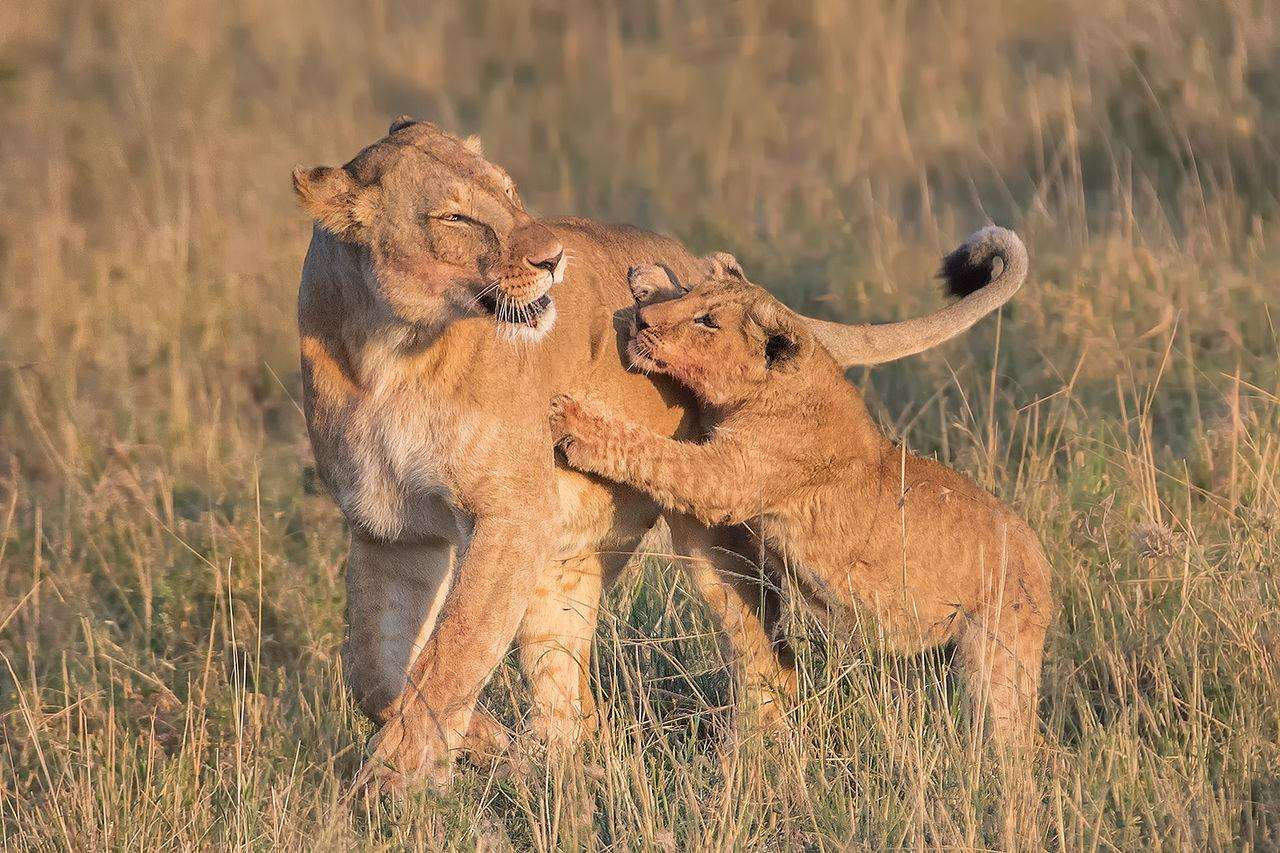

In [11]:
display(img)

In [7]:
pic_width, pic_height = img.size

In [8]:
print(pic_width, pic_height)

1280 853


In [22]:
img = img.convert('L')

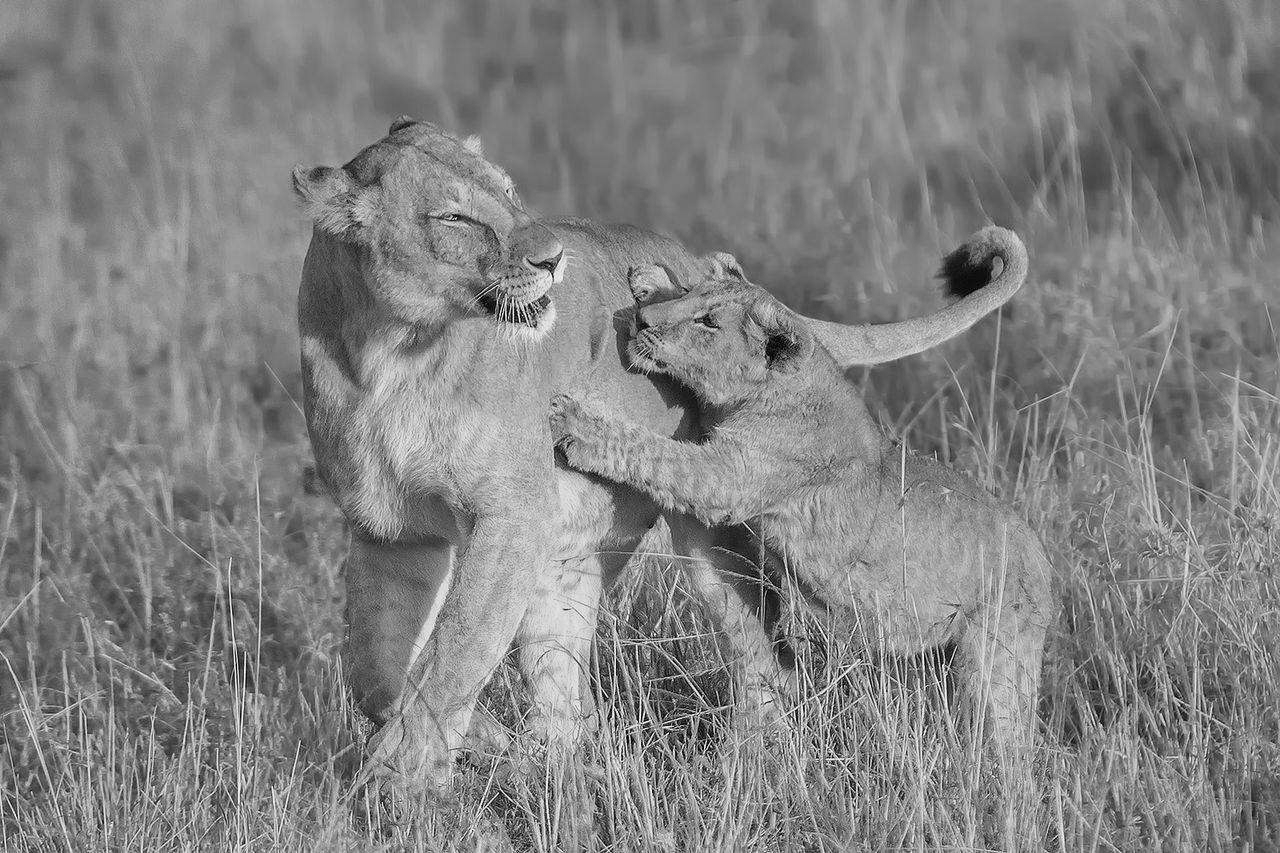

In [15]:
display(img)

In [9]:
input_arr = np.array(img)

In [11]:
xlnk = Xlnk()

In [13]:
in_buffer = xlnk.cma_array(shape = (pic_height, pic_width,3), dtype = np.uint8)
out_buffer = xlnk.cma_array(shape = (pic_height, pic_width,3), dtype = np.uint8)

In [14]:
# arr = cv2.merge([input_arr,input_arr,input_arr])
arr = input_arr

In [15]:
np.copyto(in_buffer, arr)

In [27]:
buf_img = Image.fromarray(in_buffer)

 | register offset | configuration   |
 |-----------------|------------------|
 | 0x14         |   number of rows for  original picture |
 | 0x1c         |   number of columns for original picture|

In [16]:
color.write(0x14, pic_height)
color.write(0x1c, pic_width)


In [51]:
frame = VideoMode(pic_width, pic_height,24)
# dma.AxiVDMA.readchannel.mode = frame
# dma.writechannel
i = 0
row = 0;
col = 0;
# for i in range(pic_width * pic_height):
    
# dma.AxiVDMA.write(pic_width*pic_height, in_buffer)
color.write(0x00, 0x81)
dma.writechannel.mode = frame
dma.readchannel.mode = frame
dma.readchannel.start()

dma.writechannel.start(dma)
img_frame = dma.writechannel.newframe()
img_frame[:] = img
dma.writechannel.writeframe(img_frame)

while True:
    if (dma.readchannel.activeframe == 0):
        frame = dma.readchannel.readframe()
#         image = Image.fromarray(frame)
        break

# dma.AxiVDMA.MM2SChannel.writeframe(img)
#     dma.writechannel.write(in_buffer)
# dma.readchannel.readframe(out_buffer)
# dma.writechannel.start()
# dma.readchannel.start()



# dma.sendchannel.transfer(in_buffer)
# dma.recvchannel.transfer(out_buffer)


AttributeError: module 'pynq.lib.video.dma' has no attribute 'writechannel'

In [ ]:
# dma.sendchannel.wait()
# dma.recvchannel.wait()

In [34]:
arr = cv2.merge([out_buffer[:,:,2], out_buffer[:,:,1], out_buffer[:,:,0]])
cv2.imwrite('cvt.jpg',arr)
# result = Image.fromarray(np.uint8(out_buffer))
# display(result)

True

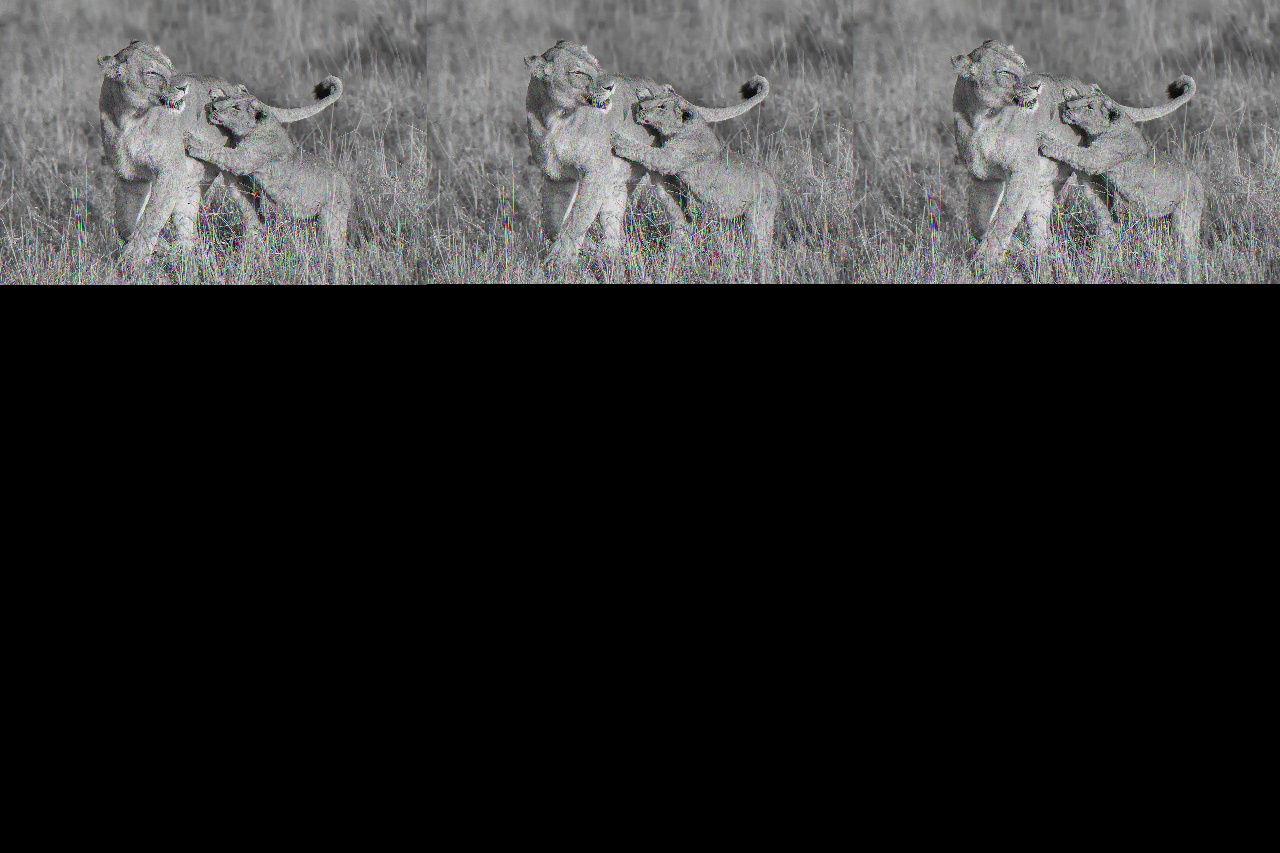

In [35]:
cvt_img = Image.open("cvt.jpg")
display(cvt_img)

In [51]:
print(out_buffer)

[[[157 143 131]
  [131 141 146]
  [140 131 134]
  ..., 
  [122 121 120]
  [119 118 118]
  [119 120 120]]

 [[141 144 147]
  [147 143 139]
  [136 134 135]
  ..., 
  [124 126 124]
  [123 121 120]
  [119 119 120]]

 [[140 141 142]
  [145 146 146]
  [144 142 149]
  ..., 
  [125 130 124]
  [116 113 115]
  [119 122 124]]

 ..., 
 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


In [21]:
print(in_buffer)

[[157 143 131 ..., 120 118 117]
 [147 138 131 ..., 120 119 118]
 [140 138 138 ..., 119 120 120]
 ..., 
 [151 122 116 ..., 154 110  95]
 [127 157 132 ..., 144  99  82]
 [165 157 120 ..., 132  91  81]]


In [33]:
xlnk.xlnk_reset()

In [21]:
color.read(0x14)

853

In [43]:
help(VideoMode)

Help on class VideoMode in module pynq.lib.video.common:

class VideoMode(builtins.object)
 |  Class for holding the information about a video mode
 |  
 |  Attributes
 |  ----------
 |  height : int
 |      Height of the video frame in lines
 |  width : int
 |      Width of the video frame in pixels
 |  stride : int
 |      Width of a line in the video frame in bytes
 |  bits_per_pixel : int
 |      Bits per pixel
 |  bytes_per_Pixel : int
 |      Bytes required to represent each pixel
 |  shape : tuple of int
 |      Numpy-style tuple describing the video frame
 |  
 |  Methods defined here:
 |  
 |  __init__(self, width, height, bits_per_pixel, fps=60, stride=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __we